## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.datasets import fetch_lfw_people

from sklearn.model_selection import train_test_split

## Tweaking Libraries

In [2]:
mpl.rcParams['figure.dpi']= 300

## Downloading the Data

Before even looking at the data, it is important that we download it in the first place.
The library automatically downloads the dataset; therefore, we will just attempt to *fetch* the data using `fetch_lfw_people()`.

According to the [`sklearn.datasets.fetch_lfw_people` docs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html), `fetch_lfw_people` can take multiple arguments...

We will be using `color`, so we will be setting that attribute to `True`.

In [3]:
lfw_people = fetch_lfw_people(funneled=True, color=True)

According to the *docs*, the *dict* output contains three important *keys* :
- *data*
- *target*
- *target_names*

So, we will go ahead and assign our `X` or *data*, our `y` or *target*, and our `names` or *target_names*.

In [4]:
X = lfw_people['data']
y = lfw_people['target']

names = lfw_people['target_names']

## Converting Data to DataFrame

We will be converting the data into a `pandas.DataFrame` in order to ease the plotting and working with the data.

In [5]:
X = pd.DataFrame(X)
y = pd.DataFrame(y, columns=['pid']) # pid is person_id

df = y.join(X)

Here's a quick look at our `DataFrame`...

In [6]:
df

,pid,0,1,2,3,4,5,6,7,8,...,8732,8733,8734,8735,8736,8737,8738,8739,8740,8741
0,5360,42.0,31.0,29.0,36.0,27.0,25.0,30.0,19.0,18.0,...,12.0,14.0,13.0,17.0,15.0,14.0,19.0,13.0,12.0,17.0
1,3434,176.0,164.0,134.0,177.0,168.0,137.0,187.0,178.0,144.0,...,129.0,137.0,143.0,136.0,133.0,140.0,133.0,128.0,135.0,128.0
2,3807,93.0,71.0,67.0,101.0,75.0,68.0,114.0,80.0,70.0,...,200.0,196.0,195.0,185.0,153.0,147.0,136.0,75.0,65.0,59.0
3,26,7.0,16.0,11.0,8.0,15.0,11.0,8.0,16.0,11.0,...,77.0,164.0,117.0,73.0,148.0,106.0,65.0,126.0,94.0,57.0
4,3957,40.0,35.0,22.0,39.0,34.0,21.0,39.0,34.0,21.0,...,7.0,27.0,18.0,6.0,31.0,20.0,8.0,37.0,23.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13228,5252,34.0,32.0,22.0,32.0,29.0,17.0,35.0,29.0,13.0,...,2.0,30.0,22.0,4.0,37.0,26.0,7.0,54.0,39.0,18.0
13229,2122,129.0,121.0,82.0,137.0,126.0,84.0,156.0,145.0,99.0,...,83.0,76.0,106.0,96.0,93.0,65.0,56.0,106.0,18.0,15.0
13230,2175,25.0,39.0,50.0,37.0,39.0,49.0,59.0,52.0,55.0,...,76.0,54.0,66.0,78.0,53.0,63.0,75.0,42.0,54.0,67.0
13231,373,11.0,15.0,24.0,18.0,22.0,33.0,54.0,58.0,69.0,...,252.0,208.0,219.0,230.0,131.0,143.0,156.0,57.0,68.0,83.0


## Looking at the Data

We have 13233 rows that we will be dealing with. First we need to identify how many unique *targets* we have.

In [7]:
num_imgs_per_pid = df['pid'].value_counts()

num_imgs_per_pid

1871    530
1047    236
5458    144
1404    121
1892    109
       ... 
1660      1
3709      1
1668      1
3717      1
0         1
Name: pid, Length: 5749, dtype: int64

According to the above output, we have *5749* unique *targets* or *person ids*.
We can also notice that the *person id* with the highest *number of images* is *1871* with *530* images.



Since we have such a huge number, we won't be plotting the *number of images* available for each *person id* with a *bar plot*.

Instead, we will be creating a *bar plot* with the *number of images* between a certain *interval*.

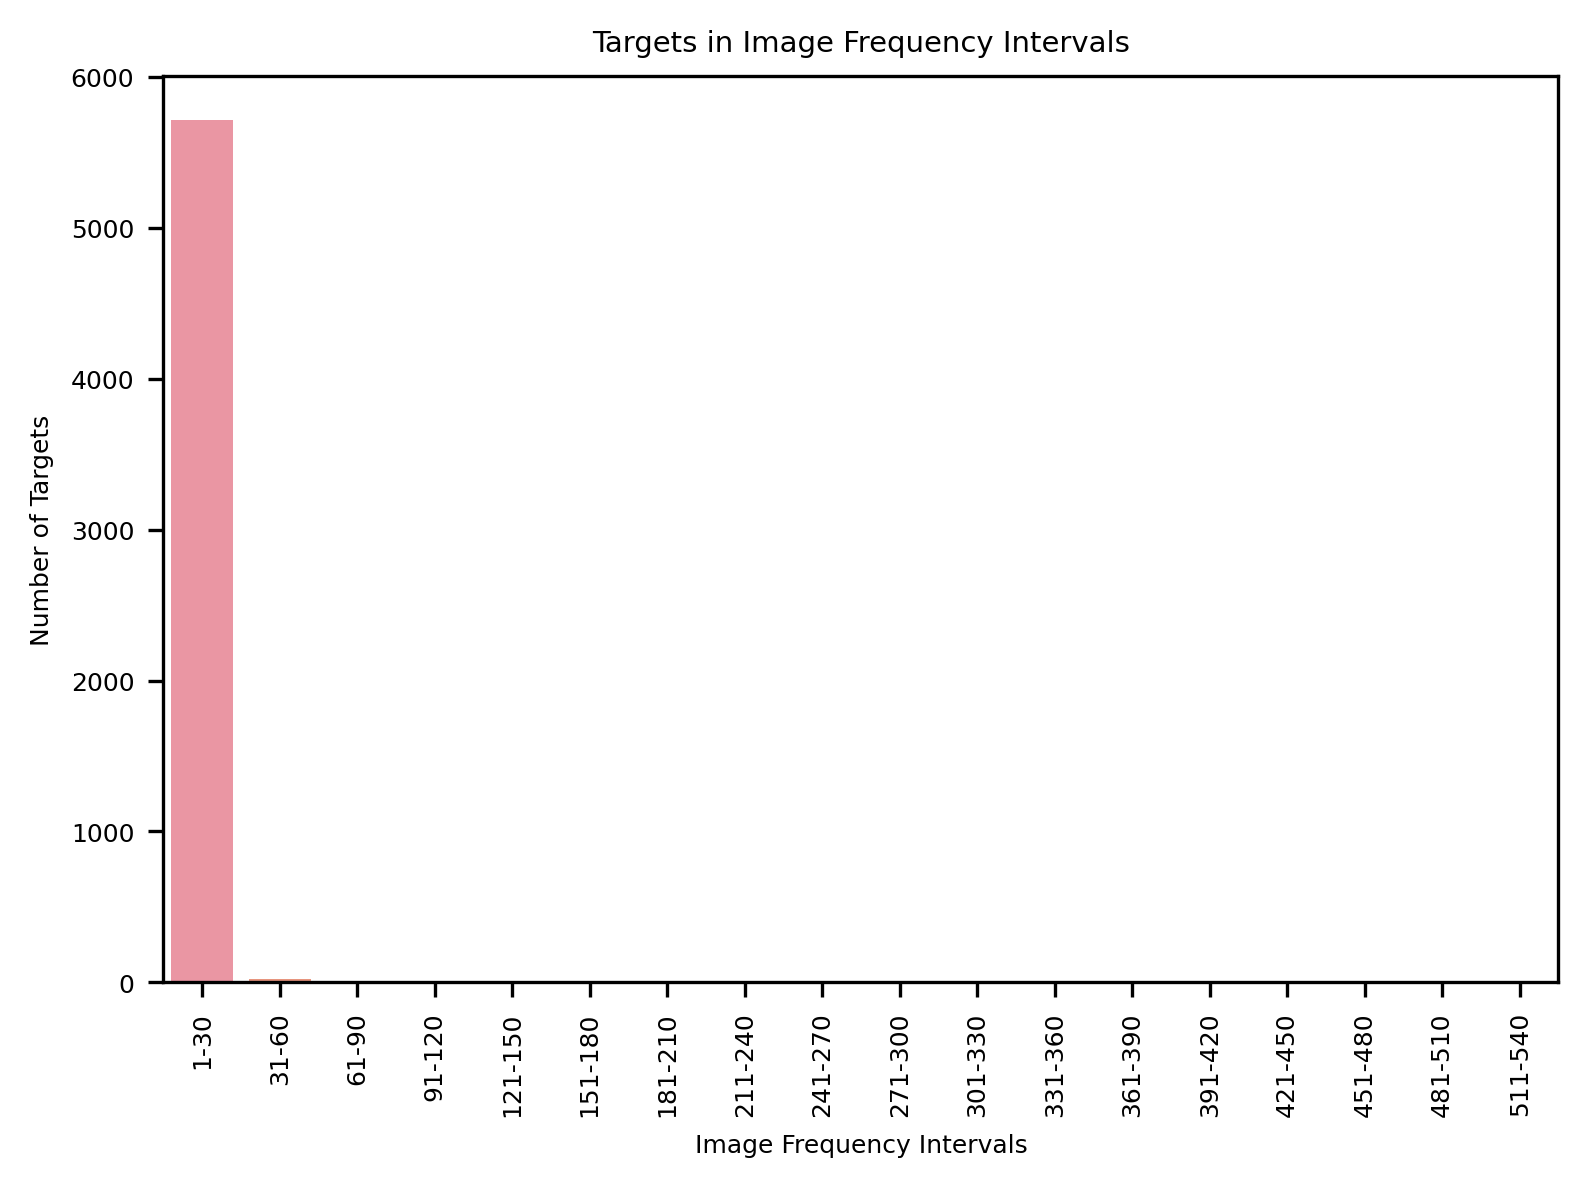

In [8]:
def plot_num_imgs_per_pid(num_imgs_per_pid, x_values):
    if type(x_values) is range:
        plot_x = [ '{0}-{1}'.format((i + 1), (i + x_values.step)) 
                      if x_values.step > 1 else (i + 1) 
                          for i in x_values ]
        plot_y = [ len(num_imgs_per_pid[num_imgs_per_pid.map(lambda x: (i) < x <= (i + x_values.step))]) 
                        for i in x_values ]
        
        plot_x_label = 'Image Frequency Intervals' if x_values.step > 1 else 'Numer of Images'
    else:
        plot_x = x_values
        plot_y = [ len(num_imgs_per_pid[num_imgs_per_pid.map(lambda x: x == i)])
                        for i in x_values ]
        
        plot_x_label = 'Numer of Images'
    
    sns.barplot(x=plot_x, y=plot_y)
    
    plt.title('Targets in Image Frequency Intervals', size=7)
    plt.xlabel(plot_x_label, size=6)
    plt.xticks(rotation='vertical', size=6)
    plt.yticks(rotation='horizontal', size=6)
    plt.ylabel('Number of Targets', size=6)
    plt.show()

plot_num_imgs_per_pid(num_imgs_per_pid, range(0, 530, 30))

As you can see, most of the targets have between 0 to 30 images. However, having a person with only 1 image can really lower the accuracy of our model. Therefore, we will be viewing the interval 0 to 30 in more depth.

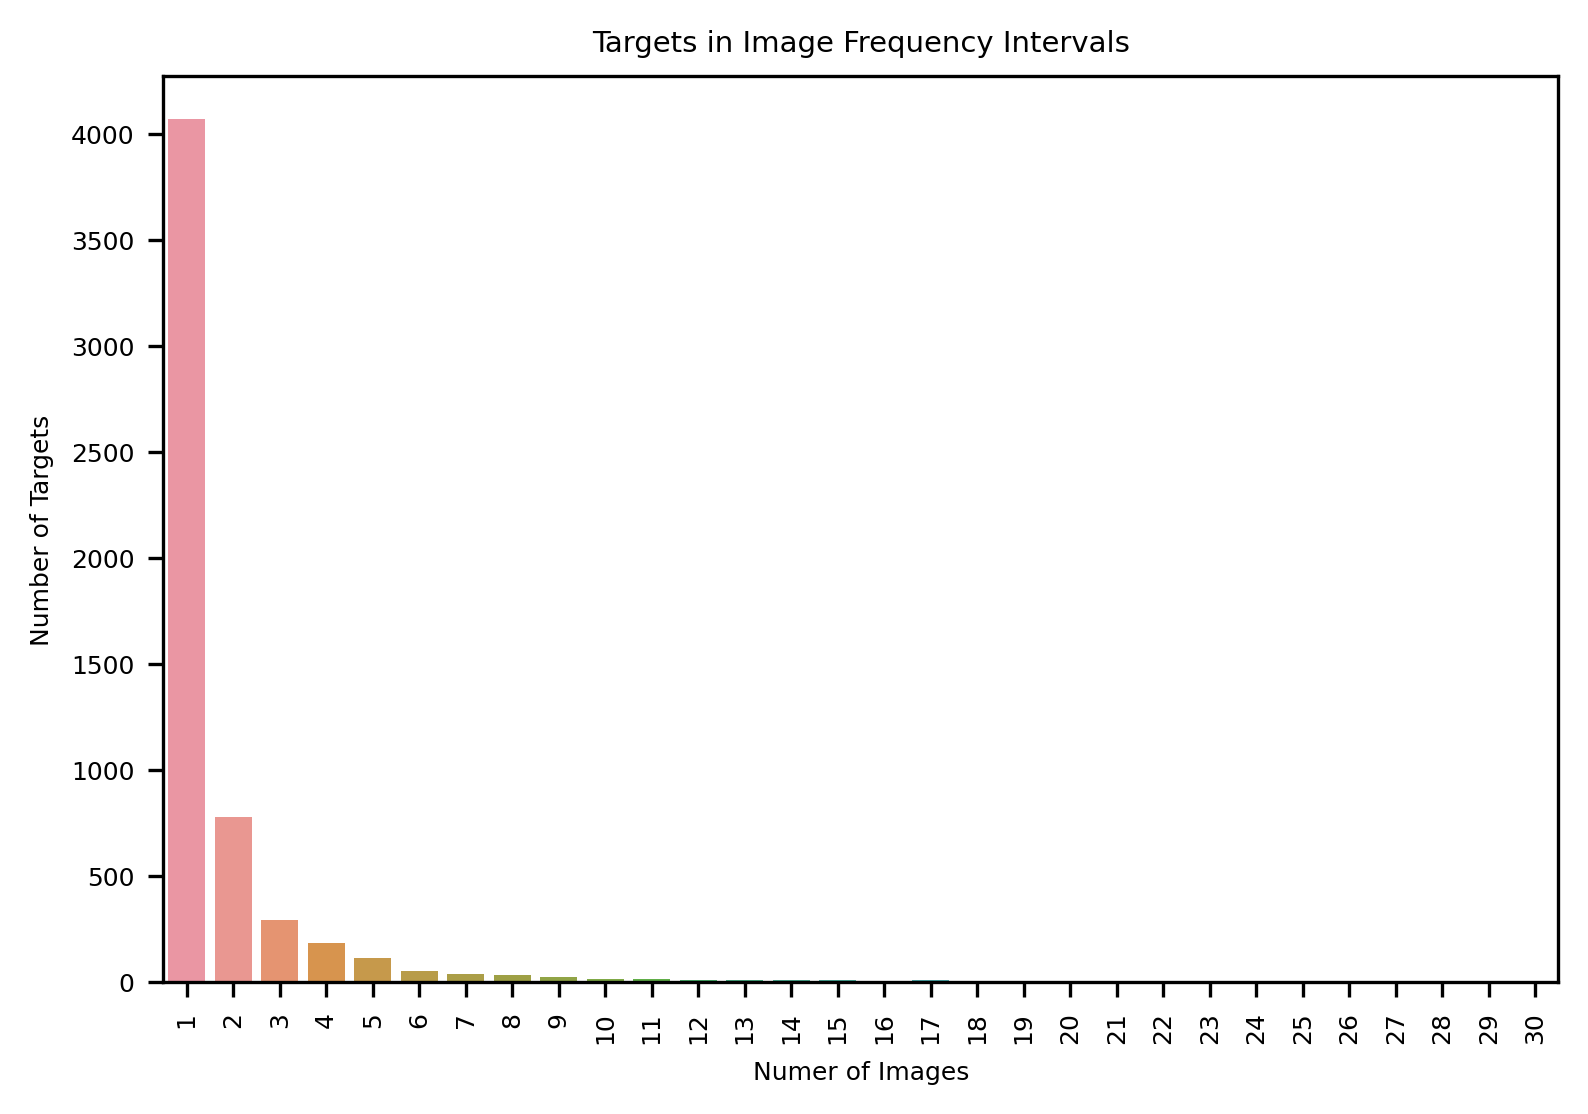

In [9]:
plot_num_imgs_per_pid(num_imgs_per_pid, range(0, 30, 1))

As we can see, most targets have only 1 *image*.

It is important that we avoid those images as we do not wish that they be present inside our *test* data.
Their presence in our *test* data can introduce faces that the model does not know; therefore, resulting in wrong predictions and lower accuracy.